In [1]:
import warnings

import pandas as pd
from gensim.models.nmf import Nmf
from gensim.models.ldamodel import LdaModel
from gensim.models.hdpmodel import HdpModel

import topic_modelling as tm

c:\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# Disable any warnings that appear
warnings.filterwarnings('ignore')

In [3]:
# Define number of topics to analyse
NUM_TOPICS: int = 5

In [4]:
# Retrieve data from the dataset
df = pd.read_csv('resources/bbc-news-data.csv', sep='\t')
data = df.content.values.tolist()

In [5]:
# Perform data preprocessing
data, id2word, corpus = tm.preprocess_data(data)

In [6]:
# Evaluate models
lda = LdaModel(corpus=corpus, id2word=id2word,
               num_topics=NUM_TOPICS, per_word_topics=True)
nmf = Nmf(corpus=corpus, id2word=id2word, num_topics=NUM_TOPICS)
hdp = HdpModel(corpus=corpus, id2word=id2word, T=NUM_TOPICS)

In [7]:
# List of excluded terms:
# ['say', 'year', 'people', 'new', 'good', 'time', 'come', 'take']

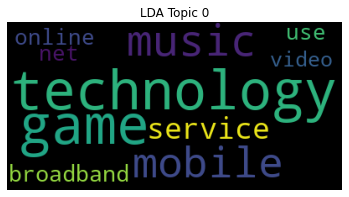

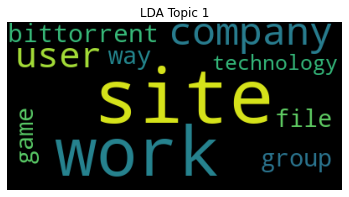

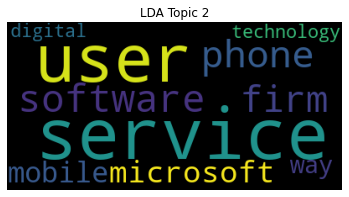

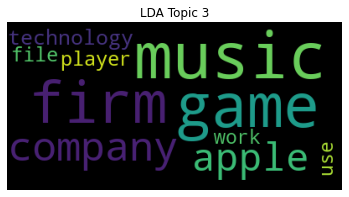

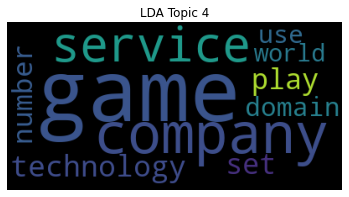

Common words in LDA:
	technology: 5
	game: 4
	service: 3
	use: 3
	company: 3


In [8]:
# Create wordclouds for LDA
lda_wordcounts = {}

for i, topic in lda.show_topics(formatted=False):
    tm.form_wordcloud(f'LDA Topic {i}', topic)
    
    for word, _ in topic:
        lda_wordcounts.setdefault(word, 0)
        lda_wordcounts[word] += 1

print('Common words in LDA:')
for word, num in lda_wordcounts.items():
    if num >= 3:
        print(f'\t{word}: {num}')

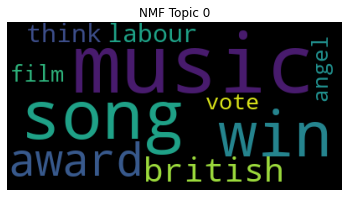

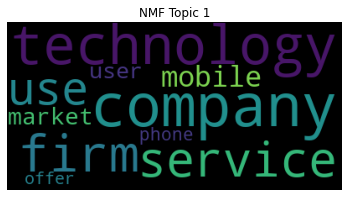

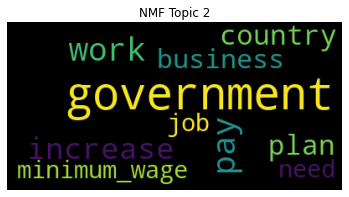

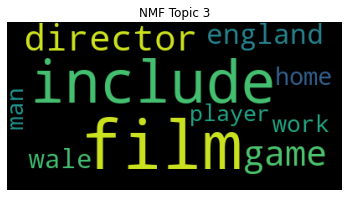

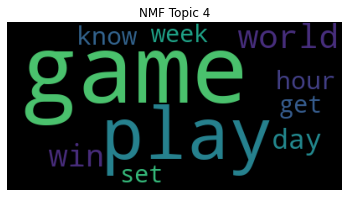

Common words in NMF:


In [9]:
# Create wordclouds for NMF
nmf_wordcounts = {}

for i, topic in nmf.show_topics(formatted=False):
    tm.form_wordcloud(f'NMF Topic {i}', topic)
    
    for word, _ in topic:
        nmf_wordcounts.setdefault(word, 0)
        nmf_wordcounts[word] += 1

print('Common words in NMF:')
for word, num in nmf_wordcounts.items():
    if num >= 3:
        print(f'\t{word}: {num}')

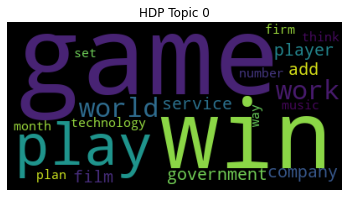

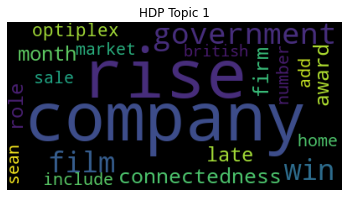

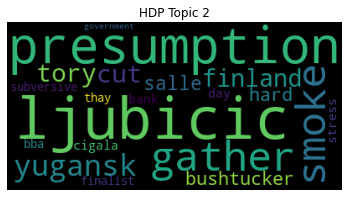

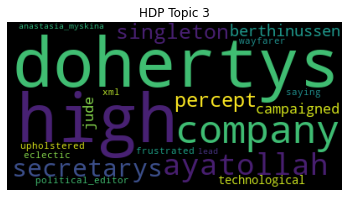

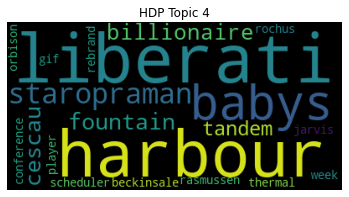

Common words in HDP:
	government: 3
	company: 3


In [10]:
# Create wordclouds for HDP
hdp_wordcounts = {}

for i, topic in hdp.show_topics(formatted=False):
    tm.form_wordcloud(f'HDP Topic {i}', topic)
    
    for word, _ in topic:
        hdp_wordcounts.setdefault(word, 0)
        hdp_wordcounts[word] += 1

print('Common words in HDP:')
for word, num in hdp_wordcounts.items():
    if num >= 3:
        print(f'\t{word}: {num}')